# Pendahuluan

Di dalam material ini, kamu akan mempelajari Data Heart Disease dan belajar bagaimana melakukan pemodelan. Lakukan kode dan jalankan setiap sel. Selama proses pembelajaran, kamu akan menemui beberapa blok **TODO** -- ikuti petunjuk untuk mengisinya sebelum menjalankan sel-sel tersebut dan melanjutkan.

In [ ]:
# Tahapan sebelumnya
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Memuat dataset yang sudah rapi ditahapan sebelumnya
data = "data.csv"
df = pd.read_csv(data, index_col=0)
df['sex'] = df['sex'].replace({'Male' : 1,'Female': 0})
df['cp'] = df['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
df['fbs'] = df['fbs'].replace({'No' : 0, 'Yes' : 1})
df['restecg'] = df['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
df['exang'] = df['exang'].replace({'No':0,'Yes':1})
df['slope'] = df['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
df['thal'] = df['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
df['ca'] = df['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
df['target'] = df['target'].replace({'No disease':0,'Disease':1})

'''TODO: Ambil variabel terpilih'''
# Variabel terpilih
df = df[[#TODO]]

In [ ]:
'''TODO: Buatlah pengalian informasi dari data teratas dan liat kolomsnya'''
# Liat informasi dari dataset yang kita miliki
print(df.#TODO)
print(df.#TODO)

**Memisahkan variabel dependen dan independen**

Variabel dependen yang digunakan adalah data pada kolom 'target', kolom feature merupakan variabel independen. Disini kamu akan membuat variabel X menggunakan .isin() untuk semua kolom kecuali kolom target, kemudian variabel y yang hanya kolom target saja.

In [ ]:
'''TODO: Pisahkan variabel X dan y'''
# Define X and y
X = #TODO
y = #TODO

In [ ]:
# Melihat kolom yang termasuk variable indepnden
X.head()

In [ ]:
# Melihat variabel dependen
y.head()

In [ ]:
'''TODO: Buatlah scaling data'''
# Mendefinisikan standard scaler
scaler = #TODO
X_scaled = scaler.fit_transform(#TODO)

**Spliting data**

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20 dan random state 42!

In [ ]:
'''TODO: Pisahkan data menjadi beberapa klasifikasi train dan testing'''
# Mendefinisikan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(#TODO , #TODO, test_size=0.2, random_state=100)

# Menampilkan hasil pemisahan berdasarkan kolom dan baris
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

**Pemodelan dengan Heart Disease Dataset**

Kita akan melakukan pemodelan untuk 4 model berbeda diantaranya logistic regression, decision tree, random forest dan neural networks.

In [ ]:
# Menyiapkan libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
'''TODO: Buatlah pengalian informasi Logistik Regresi dan hitung akurasinya'''
clf = #TODO
# train the classifier
clf.fit(#TODO)
y_pred = clf.predict(#TODO)
# printing the test accuracy
print("The test accuracy score of Logistric Regression Classifier is ", accuracy_score(#TODO))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
'''TODO: Buatlah pengalian informasi Decision Tree dan hitung akurasinya'''
clf = #TODO
# train the classifier
clf.fit(#TODO)
y_pred = clf.predict(#TODO)
# printing the test accuracy
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(#TODO))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
'''TODO: Buatlah pengalian informasi Random Forest dan hitung akurasinya'''
clf = #TODO
# train the classifier
clf.fit(#TODO)
y_pred = clf.predict(#TODO)
# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(#TODO))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
'''TODO: Buatlah pengalian informasi MLP dan hitung akurasinya'''
clf = #TODO
# train the classifier
clf.fit(#TODO)
y_pred = clf.predict(#TODO)
# printing the test accuracy
print("The test accuracy score of MLP Classifier is ", accuracy_score(#TODO))

In [ ]:
print(classification_report(y_test, y_pred))

**Membandingkan hasil diatas**

Berdasarkan hasil ke-4 model (Random Forest, Logistic Regression, Decision Tree dan Multi-layer Perceptron). Berikut didapatkan akurasi pada proses kali ini:
- Pada model Decision Tree memiliki nilai akurasi terkecil sebesar 70% dengan recall sebesar 81%.
- Random Forest memiliki nilai akurasi terbesar sebesar 84% dengan recall 84%.

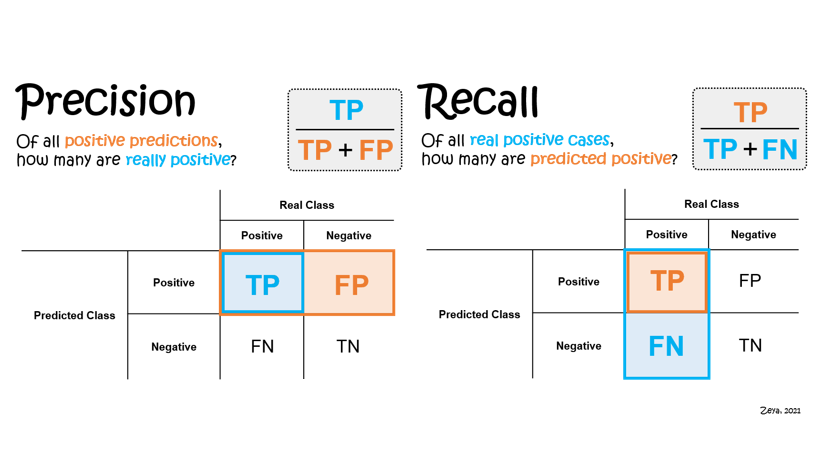

**Pojok Catatan**

Recall: Kemampuan model untuk menemukan semua kasus relevan dimana kebanyakan penting untuk deteksi risiko tinggi (seperti deteksi kanker), recall adalah metrik evaluasi yang lebih penting daripada presisi.

Dalam kasus prediksi gagal jantung, kita ingin menghindari false negatives sebanyak mungkin. Kasus false negative berarti masalah gagal jantung tidak terdeteksi, yang bisa sangat berbahaya. Dalam kasus penggunaan ini, false positives (seseorang yang sehat dengan diagnosis masalah jantung tidak sehat) tidak sepenting mencegah situasi ketika kita tidak mendeteksi masalah serius.

**Proses Hyperparameter Tuning**

In [ ]:
'''TODO: Buatlah hyperparameter Logistik Regresi dan hitung akurasinya'''
# Logistic regression classifier with hyperparameter
clf = #TODO

param_grid = {
    'max_iter': [#TODO],
    'multi_class': [#TODO],
    'solver' : [#TODO]
}

gs1 = #TODO(
        estimator= #TODO,
        param_grid = #TODO, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

fit_clf_lg = gs1.fit(#TODOn)

print(fit_clf_lg.#TODO)
print(fit_clf_lg.#TODO)

In [ ]:
y_pred = fit_clf_lg.predict(#TODO)
print(classification_report(y_test, y_pred))

Setelah dilakukan hyperparameter tuning model logistic regression terjadi peningkatan pada nilai akurasi walaupun tidak begitu signifikan. Nilai akurasi naik dari yang awalnya 81% menjadi 84%.

In [ ]:
'''TODO: Buatlah hyperparameter Random Forest dan hitung akurasinya'''
# Random Forest classifier with hyperparameter
clf = RandomForestClassifier()

param_grid = {'n_estimators': #TODO, 
               'max_depth': #TODO, 
               'criterion': #TODO}

gs1 = #TODO(
        estimator=#TODO,
        param_grid = #TODO, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

fit_clf_rf = gs1.fit(#TODO)

print(fit_clf_rf.#TODO)
print(fit_clf_rf.#TODO)

In [ ]:
y_pred = fit_clf_rf.predict(#TODO)
print(classification_report(#TODO))

Setelah dilakukan model random forest dilakukan hyperparameter tuning akurasi model menurun menjadi 82% dari yang awalnya 84%. Turunnya akurasi tersebut bukan menunjukkan hyperparameter tuning yang kita lakukan gagal, melainkan hyperparameter tuning yang kita lakukan berhasil karena dengan begitu model menjadi sedikit lebih general atau tidak overfitting.

In [ ]:
'''TODO: Buatlah hyperparameter Decision Tree dan hitung akurasinya'''
# Decision Tree classifier with hyperparameter
clf = DecisionTreeClassifier()

param_grid = {'min_samples_leaf': #TODO, 
               'max_depth': #TODO, 
               'criterion': #TODO}

gs1 = #TODO(
        estimator=#TODO,
        param_grid = #TODO, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

fit_clf_dt = gs1.fit(#TODO)

print(fit_clf_dt.#TODO)
print(fit_clf_dt.#TODO)

In [ ]:
y_pred = fit_clf_dt.predict(#TODO)
print(classification_report(#TODO))

Setelah dilakukan hyperparameter tuning model decision tree terjadi peningkatan pada nilai akurasi walaupun tidak begitu signifikan. Nilai akurasi naik dari yang awalnya 70% menjadi 77%.

In [ ]:
'''TODO: Buatlah hyperparameter MLP dan hitung akurasinya'''
# MLP Classifier with hyperparameter
clf = MLPClassifier()

param_grid1 = {'hidden_layer_sizes': #TODO, 
               'activation': #TODO, 
               'solver': #TODO}

gs1 = #TODO(
        estimator=#TODO,
        param_grid = #TODO, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

fit_clf_mlp = gs1.fit(#TODO)

print(fit_clf_mlp.#TODO)
print(fit_clf_mlp.#TODO)

In [ ]:
y_pred = fit_clf_mlp.predict(#TODO)
print(classification_report(#TODO))

Setelah dilakukan model random forest dilakukan hyperparameter tuning akurasi model menurun menjadi 81% dari yang awalnya 82%. Turunnya akurasi tersebut bukan menunjukkan hyperparameter tuning yang kita lakukan gagal, melainkan hyperparameter tuning yang kita lakukan berhasil karena dengan begitu model menjadi sedikit lebih general atau tidak overfitting.

**ROC Analysis**

Kurva yang menyajikan ilustrasi performansi dari binary classifier system dalam menghasilkan sebuah prediksi

In [ ]:
'''TODO: Silahkan buat ROC Analysis dari masing-masing model'''
# Predict the probabilities for the positive class
y_pred_logreg = #TODO
y_pred_rf = #TODO
y_pred_dt= #TODO
y_pred_mlp= #TODO

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(#TODO)
auc_rf = roc_auc_score(#TODO)
auc_dt = roc_auc_score(#TODO)
auc_mlp = roc_auc_score(#TODO)

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for MLP: {auc_mlp}")

Jika dilihat dari nilai AUC-ROC, model Random Forest memiliki nilai yang paling tinggi. Akan tetapi perbedaan nilai AUC-ROC Random Forest dengan 1 model lainnya tidak terpaut jauh dengan logistic regression.

ROC adalah kurva probabilitas dan AUC mewakili tingkat atau ukuran pemisahan. Ini menunjukkan seberapa baik model mampu membedakan antara kelas. Semakin tinggi AUC, semakin baik modelnya dalam memprediksi kelas 0 sebagai 0 dan kelas 1 sebagai 1.

Kurva ROC digambarkan dengan TPR (True Positive Rate) melawan FPR (False Positive Rate) di mana TPR berada di sumbu y dan FPR berada di sumbu x.

Model yang sangat baik memiliki AUC mendekati 1, yang berarti memiliki ukuran pemisahan yang baik. Model yang buruk memiliki AUC mendekati 0, yang berarti memiliki ukuran pemisahan yang terburuk.

Ketika AUC adalah 0.7, artinya ada peluang sebesar 70% bahwa model akan mampu membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0.5, model tidak memiliki kemampuan diskriminasi untuk membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0, model memprediksi kelas negatif sebagai kelas positif dan sebaliknya.

In [ ]:
'''TODO: Silahkan buat ROC Analysis Graph'''
#Membuat ROC Analisis
def plot_roc_curves(#TODO):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = #TODO
    fpr_rf, tpr_rf, _ = #TODO
    fpr_dt, tpr_dt, _ = #TODO
    fpr_mlp, tpr_mlp, _ = #TODO

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

    # Plot random classifier
    plt.plot(#TODO)

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp)

In [ ]:
'''TODO: Silahkan buat ROC Analysis Graph untuk menentukan treshold'''
def find_rates_for_thresholds(#TODO):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return #TODO

thresholds = np.arange(0, 1.1, 0.1)

fpr_logreg, tpr_logreg = #TODO
fpr_rf, tpr_rf = #TODO
fpr_dt, tpr_dt = #TODO
fpr_mlp, tpr_mlp = #TODO

'''TODO: Silahkan buat Summary DataFrame'''
summary_df = pd.DataFrame({#TODO})

print(summary_df)

In [ ]:
'''TODO: Silahkan buat ROC Analysis Graph untuk menentukan best treshold'''
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = #TODO
    optimal_idx = #TODO
    return #TODO

best_threshold_logreg = #TODO
best_threshold_rf = #TODO
best_threshold_dt = #TODO
best_threshold_mlp = #TODO

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for MLP: {best_threshold_mlp}")

**Ingat**

1. Jika kita menginginkan model yang memiliki sensitivitas yang tinggi, yaitu kemampuan untuk mendeteksi sebanyak mungkin kasus positif (True Positive), maka lebih baik menggunakan treshold yang lebih rendah. Namun, ini mungkin juga akan menyebabkan peningkatan False Positive Rate (kasus negatif yang salah diprediksi positif).
2. Sebaliknya, jika kita ingin mengurangi kesalahan dalam memprediksi kasus negatif sebagai positif (False Positive), maka kita akan memilih treshold yang lebih tinggi. Namun, ini dapat mengurangi sensitivitas model (menyebabkan lebih banyak True Negative yang salah diprediksi negatif).

Jadi dapat disimpulkan, bahwa model yang peformanya lebih bagus ialah model Random Forest dengan ditandai dengan model Random Forest yang memiliki nilai akurasi pada classification report tertinggi, yaitu sebesar 82% dan Model Random Forest memiliki score AUC-ROC Terbesar dibandingkan 3 model lainnya, yaitu sebesar 90%, namun model ini memiliki treshold yang tinggi dimana akan meningkatkan FPR (Kasus negatif yang salah diprediksi positif).

In [ ]:
'''TODO: Silahkan simpan model yang kamu miliki'''
import pickle
# Menyimpan model terbaik dengan pickle
pklname = #TODO

with open(pklname, 'wb') as file:  
    pickle.dump(#TODO)

Copyright © DQlab Academy x Abel Kristanto